In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df = df.iloc[:,3:]

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
n = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True)

In [17]:
n

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [18]:
n['Geography_Germany'] = n['Geography_Germany'].apply(lambda x : 1 if x else 0)

In [19]:
n

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,0,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,False,True


In [20]:
n['Geography_Spain'] = n['Geography_Spain'].apply(lambda x : 1 if x else 0)
n['Gender_Male'] = n['Gender_Male'].apply(lambda x : 1 if x else 0)

In [21]:
n

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [30]:
X = n.drop(columns = ['Exited'])
y = n['Exited']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [34]:
X_train.shape

(8000, 11)

In [35]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [42]:
X_train_scaled.shape

(8000, 11)

In [65]:
model = Sequential()
model.add(Dense(5,activation='relu',input_dim=X_train_scaled.shape[1]))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 82 (328.00 Byte)
Trainable params: 82 (328.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [69]:
history = model.fit(X_train_scaled,y_train,epochs = 50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8152 - val_loss: 0.5069 - val_accuracy: 0.8175
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8183 - val_loss: 0.4891 - val_accuracy: 0.8200
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8250 - val_loss: 0.4715 - val_accuracy: 0.8269
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.8309 - val_loss: 0.4536 - val_accuracy: 0.8313
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8378 - val_loss: 0.4377 - val_accuracy: 0.8306
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8458 - val_loss: 0.4247 - val_accuracy: 0.8419
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8489 - val_loss: 0.4147 - val_accuracy: 0.8431
Epoch 

In [70]:
model.layers[0].get_weights()

[array([[-0.11516087,  0.08161244,  0.0231595 , -0.0867781 , -0.20601158],
        [ 0.19546224,  1.0513104 ,  0.22803749,  0.50114447,  0.74951994],
        [ 0.08047838,  0.07351444,  0.58190763,  0.04742878,  0.33922097],
        [ 0.3568309 ,  0.30512196,  0.57779664, -0.25622696, -0.05729539],
        [ 1.0173233 ,  0.50958943, -0.2968123 , -1.1918694 , -0.21140212],
        [-0.04022102,  0.11822051,  0.4604491 , -0.02638265,  0.21045767],
        [ 0.3837486 , -0.55638504,  0.39574996, -0.03181875,  1.0972145 ],
        [ 0.00179117, -0.00357617,  0.01957099,  0.03703218, -0.014725  ],
        [-0.13129649,  0.07434617,  0.9075719 ,  0.399077  , -0.07966544],
        [ 0.20520101, -0.0228154 , -0.5525207 ,  0.01298794,  0.23679829],
        [-0.11701143,  0.00805279, -0.2661734 , -0.15303563,  0.08998302]],
       dtype=float32),
 array([-0.75894487,  0.11667547,  0.34693074,  0.20045848, -0.35896122],
       dtype=float32)]

In [71]:
model.layers[1].get_weights()

[array([[-0.8391198 , -0.2710429 ,  1.34016   ],
        [ 0.05639743, -0.23853408,  0.78942794],
        [-0.73528665,  0.11288363, -0.15860623],
        [ 0.61283123,  0.93515515,  0.28814328],
        [-0.286388  , -0.14936912, -1.2033113 ]], dtype=float32),
 array([-1.4462814e-01,  4.0429377e-04, -4.5802402e-01], dtype=float32)]

In [72]:
model.layers[2].get_weights()

[array([[1.2535826],
        [1.1500455],
        [1.7897003]], dtype=float32),
 array([-3.0141811], dtype=float32)]

In [73]:
out = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [74]:
y_hat = np.where(out>0.5,1,0)

In [63]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_hat,y_test)

0.8625

In [78]:
import matplotlib.pyplot as plt

In [79]:
history.history

{'loss': [0.5187700390815735,
  0.49939191341400146,
  0.48080796003341675,
  0.4623991847038269,
  0.4440440833568573,
  0.4284321963787079,
  0.41601765155792236,
  0.40603023767471313,
  0.3979398310184479,
  0.3910078704357147,
  0.38539671897888184,
  0.38078418374061584,
  0.37696370482444763,
  0.37349602580070496,
  0.37076663970947266,
  0.3684443235397339,
  0.36649593710899353,
  0.36452797055244446,
  0.3630352318286896,
  0.36153602600097656,
  0.36044326424598694,
  0.359134316444397,
  0.35816290974617004,
  0.3572218418121338,
  0.35622382164001465,
  0.35559993982315063,
  0.3551519513130188,
  0.35438260436058044,
  0.35348963737487793,
  0.3529072701931,
  0.3523612916469574,
  0.3517628610134125,
  0.35092243552207947,
  0.3504968285560608,
  0.3500584661960602,
  0.34960392117500305,
  0.34907394647598267,
  0.34890517592430115,
  0.3486359715461731,
  0.34836655855178833,
  0.3478725552558899,
  0.3477361798286438,
  0.3476150631904602,
  0.3470946252346039,
  0.3

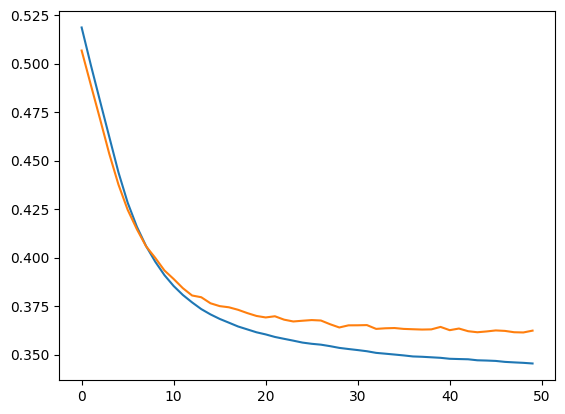

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

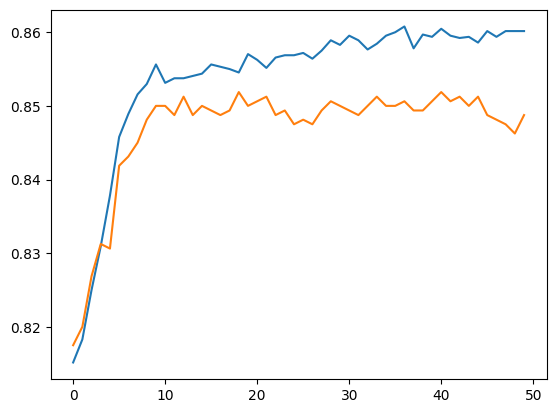

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
